# Assignment Knowledge & Data

## Notebook made by


|Naam|Studentnummer|
|-|-|
|Iris|secret|
|Naomi|secret|
|Carlijn| secret |
|Huib| secret |

## Peerreview

* Vul onderstaande dict/tabel in en run de cel. Klopt het? Zijn jullie het er allemaal mee eens?
    * Verander `1,2,3,4` door jullie studentnummers
    * `1: {1:.2,2:.3,3:.3,4:.2}` betekent dat student 1 zijn punt zo over de 4 studenten verdeelt
    * Let op, per student moeten de punten optellen tot 1!
    * De gegeven punten staan in de tabel op de rijen, de ontvangen punten in de kolommen.
    * met `cijfer_per_student` kan je bepalen welk cijfer ieder krijgt bij een gegeven groepscijfer.

## Toelichting

* De meeste opgaven worden automatisch nagekeken. Bij vrijwel alle opdrachten staan er een paar tests onder de opdracht, dit is voornamelijk om te zorgen dat je de juiste type output geeft. Dit zijn dus *NIET* alle tests, die komen er bij het graden nog bij.
* Elke vraag is 1 punt waard, tenzij anders aangegeven. Soms is die punt onderverdeeld in deelpunten, maar niet altijd. 

## Voor het inleveren!

* Pas niet de cellen aan, vooral niet die je niet kunt editen. Dit levert problemen op bij nakijken. Twijfel je of je per ongeluk iets hebt gewijzigd, kopieer dan bij inleveren je antwoorden naar een nieuw bestand, zodat het niet fout kan gaan.

* Zorg dat de code goed runt van boven naar beneden, verifieer dat door boven in Kernel -> Restart & Run All uit te voeren

## Na het inleveren!

* Het gebeurt erg vaak dat mensen een "leeg bestand" inleveren. Vaak een andere versie van de opgave die nog ergens op je computer rondslingerde. Zonde van al je werk toch!
* Dus, lever **minstens een half uur voor tijd in**. Download dan wat je hebt ingeleverd op Canvas. Geef het een andere naam om verwarring te voorkomen. En draai alle cellen, en bekijk het. Geen syntax fouten? Alle vragen gemaakt? Dan zit het vast wel goed, en hoef je niet in de zenuwen te zitten.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#RDF-plus-RDFS-conversion" data-toc-modified-id="RDF-plus-RDFS-conversion-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>RDF plus RDFS conversion</a></span><ul class="toc-item"><li><span><a href="#Vereisten" data-toc-modified-id="Vereisten-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Vereisten</a></span></li><li><span><a href="#Grading" data-toc-modified-id="Grading-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Grading</a></span></li></ul></li></ul></div>

# RDF plus RDFS conversion

* We will transform our family and LHBTI++ knowledge base into an RDF database and query it using SPARQL.
* The idea is that **you create this notebook as a tutorial on working with `rdflib`**.
* You will find many on the web, so search, watch and use the best what you can find to make a fun and top tutorial.

## Vereisten

1. `networkx2RDF(G)` takes any digraph G with additional node attributes and transform it to an RDF database.
2. Maak SPARQL queries voor al je gedefinieerde relaties. 
    * Check dat de antwoorden identiek zijn.
3. Download een andere triple store en maak daar juist een networkx graaf van (dat kan met rdflib), en bereken wat netwerk maten daarop.

## Grading

* Deze opdracht doen we met peergrading.
* Ieder groepje kijkt alle anderen en zichzelf na en geeft ieder groepje een deel van in totaal 100 te verdelen  punten.
* De eindscores transformeren we dan naar een cijfer tussen de 1 en 10. 

# **Tutorial**
### Installeer de benodigde pakketten en importeer de functies
Voor deze tutorial heb je RDFlib en NetworkX nodig. Dit installeer je met behulp van Python Package Manager: ```pip```. Hieronder kun je de tweede en derde regel uncommenten om dit te doen.



In [3]:
# Uncomment deze twee regels om RDFlib en NetworkX te installeren.
# !pip install rdflib
# !pip install networkx

from rdflib import Graph, RDF, Namespace, URIRef
from rdflib.extras.external_graph_libs import rdflib_to_networkx_graph
import networkx as nx

## **NetworkX DiGraph omzetten naar RDF**


### Maak een aantal DiGraphs aan om je functies/queries mee te testen
Je kan ook je eigen familie/liefdesnetwerken toevoegen!

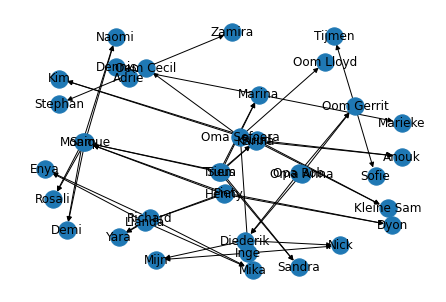

In [5]:
# Voorbeeld familienetwerk voor testen queries
F= nx.DiGraph() 

# Voeg alle ('isOuderVan'-)relaties toe (edges) en definieer het ook zo door de Edge-data het type van de relatie te geven.
F.add_edges_from([('Diederik','Mijn'), ('Diederik', 'Nick'), ('Inge', 'Nick'), ('Inge', 'Mijn'), ('Oma Sefoera', 'Inge'), ('Oma Sefoera', 'Oom Lloyd'), ('Oma Sefoera', 'Oom Cecil'), ('Opa Rob', 'Diederik'), ('Opa Rob', 'Oom Gerrit'), ('Oma Anna', 'Diederik'), ('Oma Anna', 'Oom Gerrit'), ('Oom Gerrit', 'Tijmen'), ('Oom Gerrit', 'Sofie'),
                 ('Sam', 'Naomi'),('Sam', 'Demi'), ('Sam', 'Rosali'), ('Monique', 'Naomi'), ('Monique', 'Demi'),('Monique', 'Rosali'),
                 ('Piet', 'Monique'), ('Henny', 'Monique'), ('Piet', 'Dyon'), ('Piet', 'Lianda'), ('Henny', 'Dyon'),
                 ('Henny', 'Lianda'), ('Lianda', 'Mika'), ('Lianda', 'Enya'), ('Lianda', 'Yara'), ('Richard', 'Mika'), ('Richard', 'Enya'), ('Richard', 'Yara'),
                 ('Siem', 'Sam'), ('Siem', 'Ruud'), ('Siem', 'Sandra'), ('Siem', 'Marina'), ('Ruud', 'Kim'), ('Ruud', 'Anouk'), ('Ruud', 'Kleine Sam'),
                 ('Truus', 'Ruud'), ('Truus', 'Sandra'), ('Truus', 'Marina'), ('Truus', 'Sam'), ('Marina', 'Dennis'), ('Adrie', 'Dennis'), ('Marina', 'Marieke'),
                 ('Adrie', 'Dennis'), ('Oom Cecil', 'Zamira'), ('Oom Cecil', 'Stephan'), ('Karina', 'Kim'), ('Karina', 'Anouk'), ('Karina', 'Kleine Sam')], isOuderVan=True)

# Maak onderscheid tussen de mannen en vrouwen in het netwerk
M,V= {'Nick', 'Diederik', 'Oom Lloyd', 'Oom Gerrit', 'Oom Cecil', 'Opa Rob', 'Tijmen', 'Sam', 'Piet', 'Dyon', 'Mika', 'Richard', 'Siem', 'Ruud', 'Kleine Sam', 'Dennis', 'Adrie', 'Stephan'},{'Mijn', 'Sandra', 'Inge', 'Oma Sefoera', 'Oma Anna', 'Sofie', 'Naomi', 'Demi', 'Rosali', 'Monique', 'Henny', 'Lianda', 'Enya', 'Yara', 'Kim', 'Anouk', 'Karina', 'Marina', 'Truus', 'Marieke', 'Zamira'} 

# Voeg de gender toe en eventuele andere attributen 
F.add_nodes_from(M, gender='M')
F.add_nodes_from(V, gender='V')


# We tekenen het netwerk om even te checken hoe het eruit ziet
nx.draw(F, with_labels=True)

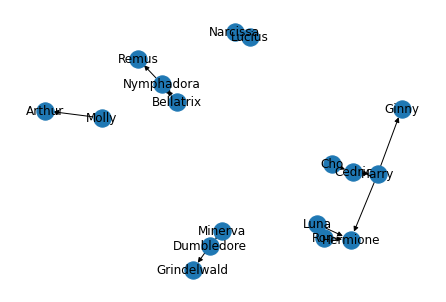

In [6]:
# Voorbeeld relatienetwerk voor testen queries
H = nx.DiGraph() 

# Voeg alle tweeplaatsige ('heeftRelatie'/liefdes-)relaties toe (edges) en definieer het ook zo door de Edge-data het type van de relatie te geven.
H.add_edges_from([('Ron', 'Hermione'), ('Harry', 'Ginny'), ('Dumbledore', 'Grindelwald'), ('Bellatrix', 'Nymphadora'), ('Nymphadora', 'Bellatrix'), ('Nymphadora', 'Remus'), ('Narcissa', 'Lucius'), ('Lucius', 'Narcissa'), ('Cedric', 'Harry'), ('Luna', 'Hermione'), ('Minerva', 'Dumbledore'), ('Cho', 'Cedric'), ('Molly', 'Arthur'), ('Harry', 'Hermione')], heeftRelatie=True)

# Maak onderscheid tussen de genders
M,V,T,I = {'Ron', 'Harry', 'Dumbledore', 'Grindelwald', 'Remus', 'Lucius', 'Cedric', 'Arthur'}, {'Hermione', 'Ginny', 'Bellatrix', 'Nymphadora', 'Narcissa', 'Luna', 'Molly'}, {'Minerva'}, {'Cho'}

# Zet de M, V, T en I goed 
H.add_nodes_from(M, gender='M')
H.add_nodes_from(V, gender='V')
H.add_nodes_from(T, gender='T')
H.add_nodes_from(I, gender='I')

# We tekenen het netwerk om even te checken hoe het eruit ziet
nx.draw(H, with_labels=True)

### Maak functie ```networkx2RDF``` die 'networkx DiGraph' omzet naar 'RDF'

In [57]:
def networkx2RDF(G):
    
    Mens = Namespace("http://example.org/mens/")
    
    # Maak een RDF graaf
    g = Graph()
    
    # Verkrijg alle attributen
    attributen = set()
    for node in G.nodes(data=True):
        for attribuut in node[1].keys():
            attributen.add(attribuut)
        
    # Voeg attributen toe als predicaten
    for node in G.nodes(data=True):
        for attribuut in attributen:
            if attribuut in node[1]:  
                # Soms komt het voor dat een onderdeel zoals naam, of type relatie een spatie bevat. Hier worden deze vervangen met een underscore.
                URIs = node[0].replace(' ','_')
                URIp = attribuut.replace(' ','_')
                URIo = str(node[1][attribuut]).replace(' ','_')
                # Voeg alle resources toe aan onze graaf
                s = URIRef(f'http://example.org/mens/' + URIs)
                p = URIRef(f'http://example.org/mens/' + URIp)
                o = URIRef(f'http://example.org/mens/' + URIo)
                g.add((s,p,o))

    # Voeg edges toe als de relatie die wordt meegegeven in de edge (als deze onbekend is wordt de relatie defeinieerd als: 'heeftOnbekendeRelatieMet')
    for edge in G.edges(data=True):
        URIs = edge[0].replace(' ','_')
        # Hier wordt gecheckt of de relatie is meegegeven met de edges (en anders wordt gesteld dat het type relatie onbekend is)
        if list(edge[2].keys()):   
            URIp = list(edge[2].keys())[0].replace(' ','_')
        else:
            URIp = 'heeftOnbekendeRelatieMet'
        URIo = edge[1].replace(' ','_')
        s = URIRef(f'http://example.org/mens/' + URIs)
        p = URIRef(f'http://example.org/mens/' + URIp)
        o = URIRef(f'http://example.org/mens/' + URIo)
        g.add((s,p,o))
        
    return(g)


## **Queries maken voor liefdes- en familierelaties**

#### We beginnen met de SparQL-queries voor familierelaties.
Dit doen we natuurlijk op dezelfde manier waarop we dit in week 2 hebben gedaan, bijvoorbeeld:
- X is vader van Y als X een man is en X ouder is van Y

Je kan ook je eigen queries proberen met je eigen edge-attributen: elke SparQL-query kan je proberen! Tweak de voorbeelden die we hebben gegeven en vraag bijvoorbeeld op wie alle kleinkinderen zijn van Oma X!

In [12]:
# We gebruik het familienetwerk en zetten dat om met de hierboven gedefinieerde functie.
g = networkx2RDF(F)


# Hier definieren we al onze queries.
# X is vader van Y als X een man is en X ouder is van Y
vader = g.query(
    """
    PREFIX Mens: <http://example.org/mens/>
    SELECT DISTINCT ?vader ?kind
    WHERE {
      ?vader Mens:gender Mens:M .
      ?vader Mens:isOuderVan ?kind .   
    }""")

# X is moeder van Y als X een vrouw is en X ouder is van Y
moeder = g.query(
    """
    PREFIX Mens: <http://example.org/mens/>
    SELECT DISTINCT ?moeder ?kind
    WHERE {
      ?moeder Mens:gender Mens:V .
      ?moeder Mens:isOuderVan ?kind .   
    }""")

# X is opa van Y als X een man is en Z ouder is van Y en X de ouder is van Z
opa = g.query(
    """ PREFIX Mens: <http://example.org/mens/>
    SELECT DISTINCT ?opa ?kleinkind
    WHERE {
      ?opa Mens:gender Mens:M .
      ?opa Mens:isOuderVan ?ouder .
      ?ouder Mens:isOuderVan ?kleinkind . 
    }""")

# X is oma van Y als X een vrouw is en Z ouder is van Y en X de ouder is van Z
oma = g.query(
    """ PREFIX Mens: <http://example.org/mens/>
    SELECT DISTINCT ?oma ?kleinkind
    WHERE {
      ?oma Mens:gender Mens:V .
      ?oma Mens:isOuderVan ?ouder .
      ?ouder Mens:isOuderVan ?kleinkind . 
    }""")

# X is oom van Y als Z ouder is van Y Q is ouder van Z en Q is ouder van X en X is een man
oom = g.query(
    """ PREFIX Mens: <http://example.org/mens/>
    SELECT DISTINCT ?oom ?kind
    WHERE {
      ?oom Mens:gender Mens:M .
      ?ouder Mens:isOuderVan ?kind .
      ?grootouder Mens:isOuderVan ?ouder .
      ?grootouder Mens:isOuderVan ?oom . 
      FILTER(?ouder != ?oom)  
    }""")

# X is tante van Y als Z ouder is van Y Q is ouder van Z en Q is ouder van X en X is een vrouw
tante = g.query(
    """ PREFIX Mens: <http://example.org/mens/>
    SELECT DISTINCT ?tante ?kind
    WHERE {
      ?tante Mens:gender Mens:V .
      ?ouder Mens:isOuderVan ?kind .
      ?grootouder Mens:isOuderVan ?ouder .
      ?grootouder Mens:isOuderVan ?tante . 
      FILTER(?ouder != ?tante)  
    }""")

# X is neef van Y als Z ouder is van X en Q ouder is van Z en Q ouder is van R en R ouder is van Y en X is een man 
neef = g.query(
    """ PREFIX Mens: <http://example.org/mens/>
    SELECT DISTINCT ?neef ?kind
    WHERE {
      ?neef Mens:gender Mens:M .
      ?ouder Mens:isOuderVan ?neef .
      ?grootouder Mens:isOuderVan ?ouder .
      ?grootouder Mens:isOuderVan ?ouderb .
      ?ouderb Mens:isOuderVan ?kind 
      FILTER(?ouder != ?ouderb)
    }""")

# X is nicht van Y als Z ouder is van X en Q ouder is van Z en Q ouder is van R en R ouder is van Y en X is een vrouw 
nicht = g.query(
    """ PREFIX Mens: <http://example.org/mens/>
    SELECT DISTINCT ?nicht ?kind
    WHERE {
      ?nicht Mens:gender Mens:V .
      ?ouder Mens:isOuderVan ?nicht .
      ?grootouder Mens:isOuderVan ?ouder .
      ?grootouder Mens:isOuderVan ?ouderb .
      ?ouderb Mens:isOuderVan ?kind 
      FILTER(?ouder != ?ouderb)
    }""")

# Definieer hieronder eventuele eigen queries! Maak gebruik van onze voorbeelden als je vastzit.
jouw_query = g.query(
    """ PREFIX Mens: <http://example.org/mens/>
    SELECT DISTINCT ?kleinkind
    WHERE {
      # Hier jouw query
    }""")

print(list(jouw_query))

[]


### We defineren nu de SparQL-queries voor de liefdesrelaties
Dit doen we natuurlijk op dezelfde manier waarop we dit in week 2 hebben gedaan, bijvoorbeeld:
- X is vader van Y als X een man is en X ouder is van Y

Ook hier kan je je eigen queries proberen: elke SparQL-query kan je proberen! Tweak de voorbeelden die we hebben gegeven en zoek bijvoorbeeld !



In [55]:
#liefdesnetwerk
l = networkx2RDF(H)

# Heteroseksuelen worden gedefinieerd als personen die enkel van personen van het andere traditionele geslacht houden. Dit zijn dus mannen die enkel van vrouwen houden of vrouwen die enkel van mannen houden.
heteroseksueel = l.query("""
      PREFIX Mens: <http://example.org/mens/>
      SELECT DISTINCT ?x ?y
      WHERE {
          {?x Mens:heeftRelatie ?y .
            ?x Mens:gender Mens:M .
            ?y Mens:gender Mens:V .}

            UNION
            {?x Mens:heeftRelatie ?y .
            ?x Mens:gender Mens:V .
            ?y Mens:gender Mens:M .}
            }""")

# Lesbiennes worden gedefinieerd als vrouwen die enkel en alleen houden van andere vrouwen.
lesbiennes = l.query("""
      PREFIX Mens: <http://example.org/mens/>
      SELECT DISTINCT ?x ?y
      WHERE {?x Mens:heeftRelatie ?y .
            ?x Mens:gender Mens:V .
            ?y Mens:gender Mens:V .
            }""")

# Homoseksuelen worden gedefinieerd als mannen die enkel en alleen houden van andere mannen.
homoseksuelen = l.query("""
      PREFIX Mens: <http://example.org/mens/>
      SELECT DISTINCT ?x ?y
      WHERE {?x Mens:heeftRelatie ?y .
            ?x Mens:gender Mens:M .
            ?y Mens:gender Mens:M .
            }""")

# Biseksuelen worden gedefinieerd als personen die zowel van mannen als vrouwen houden.
biseksuelen = l.query("""
      PREFIX Mens: <http://example.org/mens/>
      SELECT DISTINCT ?x ?y
      WHERE {
          {?x Mens:heeftRelatie ?y .
            ?x Mens:gender Mens:M .
            ?y Mens:gender Mens:M .}

            UNION
            {?x Mens:heeftRelatie ?y .
            ?x Mens:gender Mens:M .
            ?y Mens:gender Mens:V .}
            
            UNION
            {?x Mens:heeftRelatie ?y .
            ?x Mens:gender Mens:V .
            ?y Mens:gender Mens:V .}    
            }""")

# Queer wordt beschouwd als een 'umbrella-term' waaronder alle personen vallen die zich niet per definitie kunnen vinden in de hokjes zoals de maatschappij die ons geeft. Iedereen kan queer zijn.
queer = l.query("""
        PREFIX Mens: <http://example.org/mens/>
        SELECT DISTINCT ?o WHERE {?o ?p ?s
        }""")

# Aseksuelen worden gedefinieerd als personen die van geen enkel ander persoon houden.
aseksuelen = l.query("""
        PREFIX Mens: <http://example.org/mens/>
        SELECT DISTINCT ?o
        WHERE { 
        FILTER NOT EXISTS {?o Mens:heeftRelatie ?s.}
        ?o ?p ?s.
        }
        """)

# Panseksuelen worden gedefinieerd als mannen die enkel en alleen houden van andere mannen.
panseksuelen = l.query("""
      PREFIX Mens: <http://example.org/mens/>
      SELECT DISTINCT ?x ?y
      WHERE {?x Mens:heeftRelatie ?y .
            }""")

# Definieer hieronder eventuele eigen queries of probeer dit! Maak gebruik van onze voorbeelden als je vastzit.
jouw_query = g.query(
    """ PREFIX Mens: <http://example.org/mens/>
    SELECT DISTINCT ?kleinkind
    WHERE {
      # Hier jouw query
    }""")

print(list(jouw_query))

[]


## **RDF omzetten naar NetworkX**

### Maak een RDF Graph en download (en parse) een Triple Store 
Leuk: vervang Heemstede door je eigen onderwerp!

In [38]:
k = Graph()
# We halen de resources op van DBPedia. Voel je vrij je eigen RDF-bron te gebruiken (en de resource natuurlijk te vervangen!).
onderwerp = 'Heemstede'
k.parse('http://dbpedia.org/resource/'+ onderwerp.replace(' ', '_'))

<Graph identifier=Nfe74b50e7f1b44c4ab3587d097a59874 (<class 'rdflib.graph.Graph'>)>

### Zet de RDF Graph om naar een NetworkX Graph, met de geimporteerde functie van rdflib (```rdflib_to_networkx_graph```)

Zo kunnen we de NetworkX functies gebruiken om netwerk-maten te berekenen.

In [32]:
netwerk = rdflib_to_networkx_graph(k)

### Bereken wat leuke netwerk-maten op de graaf zoals:
- Grootte van het netwerk
- Diameter
- Radius
- Dichtheid
- Betweenness Centrality

**Laten we beginnen!** We starten met wat beginnende informatie over het netwerk op te vragen met ```nx.info```

In [43]:
print(nx.info(netwerk))

Name: 
Type: Graph
Number of nodes: 162
Number of edges: 162
Average degree:   2.0000


Zo hebben we een beeld van de grootte van het netwerk. 

Laten we verder gaan met het berekenen van een maat die je kent van de wiskunde: **de diameter**. Dit is de grootst mogelijke afstand tussen twee punten in het netwerk, door het midden heen getrokken. 

In [34]:
# Diameter berekenen
print('De diameter is',nx.diameter(netwerk))

De diameter is 2


Vervolgens berekenen we **de radius**, ookwel de straal, van het netwerk. Dit is de afstand van een willekeurig punt in het netwerk, naar het midden van het netwerk. 

In [35]:
# Radius berekenen
print('De radius is', nx.radius(netwerk))

De radius is 1


Nu willen we graag de **grootte van het netwerk** berekenen. Dit doen we met ```len```. 

In [36]:
# Grootte netwerk berekenen
print('De grootte van het netwerk is', len(netwerk))

De grootte van het netwerk is 162


Verder kunnen we de **dichtheid** berekenen. Dit kan met ```nx.density```. 

In [39]:
# Dichtheid netwerk berekenen
print('De dichtheid van het netwerk is', nx.diameter(netwerk))

De dichtheid van het netwerk is 2


De **betweenness centrality** bereken je met de networkx functie die hiervoor gemaakt is. Dit vertelt ons hoeveel invloed een knooppunt heeft in de stroom van informatie van de grafiek.

***Uitleg***: *Bijna alle knopen (in een groot netwerk) hebben een waarde van 0.00 (afgerond)behalve de 'hoofdknop' (in ons voorbeeld Heemstede). Dat komt doordat de hoofdknoop met alle knopen verbonden is en de overige knopen alleen aan de hoofdknoop.*

In [41]:
# Betweenness centrality berekenen
print('De betweenness centrality is', nx.betweenness_centrality(netwerk))

De betweenness centrality is {rdflib.term.URIRef('http://dbpedia.org/resource/Frans_Bauer'): 1.0, rdflib.term.URIRef('http://fr.dbpedia.org/resource/Frans_Bauer'): 0.0, rdflib.term.URIRef('http://viaf.org/viaf/33191083'): 0.0, rdflib.term.URIRef('http://dbpedia.org/resource/Category:Dutch_levenslied_singers'): 0.0, rdflib.term.Literal('Frans Bauer', lang='en'): 0.0, rdflib.term.URIRef('http://dbpedia.org/resource/Candee_Jay'): 0.0, rdflib.term.URIRef('http://dbpedia.org/resource/VESTROCK'): 0.0, rdflib.term.URIRef('http://dbpedia.org/class/yago/WikicatDutchMaleSingers'): 0.0, rdflib.term.URIRef('http://dbpedia.org/ontology/Person'): 0.0, rdflib.term.URIRef('http://dbpedia.org/class/yago/Musician110340312'): 0.0, rdflib.term.Literal('Frans Bauer est un chanteur néerlandais né le 30 décembre 1973 à Roosendaal.', lang='fr'): 0.0, rdflib.term.URIRef('http://dbpedia.org/class/yago/WikicatEnglish-languageSingersOfTheNetherlands'): 0.0, rdflib.term.Literal('فرانس باور', lang='ar'): 0.0, rdfli